In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/CarPrice_Assignment.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3028\449910176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

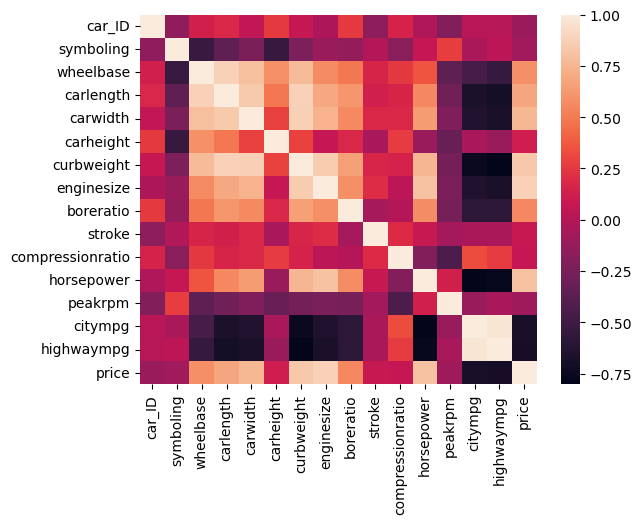

In [6]:
corr = data.corr()
sns.heatmap(corr)

In [7]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


First I'm going to make a model that predict the horsepower by engine size.

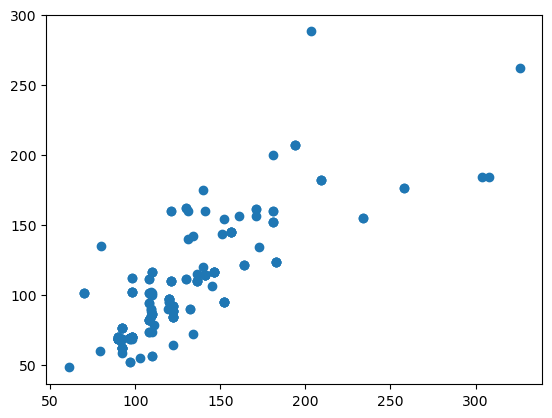

In [9]:
plt.scatter(data['enginesize'],data['horsepower'])

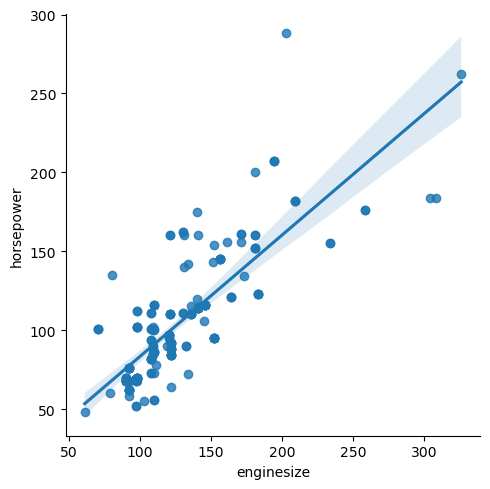

In [11]:
sns.lmplot(data, x='enginesize', y='horsepower')

In [25]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = np.array(data['enginesize']).reshape(-1, 1)
y = np.array(data['horsepower'])

X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=754, 
                                   test_size=0.3, 
                                   shuffle=True)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:

y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    print("Predicted:", y_pred[i], "\tActual:", y_test[i])

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Predicted: 120.75217420268336 	Actual: 154
Predicted: 151.24899438905834 	Actual: 207
Predicted: 81.54197682020127 	Actual: 102
Predicted: 98.24261644607327 	Actual: 160
Predicted: 67.7457962596983 	Actual: 60
Predicted: 106.22987887583814 	Actual: 90
Predicted: 61.21076336261795 	Actual: 101
Predicted: 90.2553540163084 	Actual: 86
Predicted: 120.0260594363411 	Actual: 143
Predicted: 75.73305868946318 	Actual: 68
Predicted: 90.98146878265067 	Actual: 78
Predicted: 88.80312448362388 	Actual: 111
Predicted: 85.17255065191257 	Actual: 55
Predicted: 112.7649117729185 	Actual: 114
Predicted: 98.96873121241553 	Actual: 88
Predicted: 89.52923924996614 	Actual: 90
Predicted: 104.77764934315363 	Actual: 111
Predicted: 97.51650167973101 	Actual: 97
Predicted: 89.52923924996614 	Actual: 88
Predicted: 109.13433794120719 	Actual: 110
Predicted: 97.51650167973101 	Actual: 97
Predicted: 107.68210840852267 	Actual: 72
Predicted: 81.54197682020127 	Actual: 70
Predicted: 151.24899438905834 	Actual: 207


In [32]:
#Tuning the model for the best accuricy

r2_list = []

for i in range(10000):
    X = np.array(data['enginesize']).reshape(-1, 1)
    y = np.array(data['horsepower'])

    X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                       random_state=i, 
                                       test_size=0.3, 
                                       shuffle=True)
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

best_index = np.argmax(r2_list)
print(best_index)

754
